In [206]:
# Data Handling
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch

# Data Visualization
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
%matplotlib inline

# Pattern Matching
import re

# ML Models
from sklearn.tree import DecisionTreeClassifier
import torch.nn as nn 
import torch.functional as F

# Model Evaluation Metrices 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [207]:
# Data Loading
data = pd.read_csv("mushrooms.csv").dropna()

In [208]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [209]:
# Renaming Columns

columns = list(data.columns)

NewColumnNames = {}

for col in columns:
    regex = "-"
    pattern = re.findall(regex, col)
    if len(pattern) != 0:
        NewColumnNames[col] = col.replace("-", "")

In [210]:
data = data.rename(columns = NewColumnNames)
data.head()

,class,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [211]:
# Dependant and independent feature split 

X = data.drop(columns=["class"])
y = data["class"]

In [212]:
# get the unique value of columns for encoding

for col in data.columns:
    print(f"{col} --> {len(data[col].unique())}")

class --> 2
capshape --> 6
capsurface --> 4
capcolor --> 10
bruises --> 2
odor --> 9
gillattachment --> 2
gillspacing --> 2
gillsize --> 2
gillcolor --> 12
stalkshape --> 2
stalkroot --> 5
stalksurfaceabovering --> 4
stalksurfacebelowring --> 4
stalkcolorabovering --> 9
stalkcolorbelowring --> 9
veiltype --> 1
veilcolor --> 4
ringnumber --> 3
ringtype --> 5
sporeprintcolor --> 9
population --> 6
habitat --> 7


In [213]:
# Encoding the features using Label Encoder

encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype is np.dtype("object"):
        X[col] = encoder.fit_transform(X[col])

X.head()

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [214]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6499, 22)
(1625, 22)
(6499,)
(1625,)


In [215]:
# Defining and fitting the decision tree classifier

classifier = DecisionTreeClassifier(criterion="gini")
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

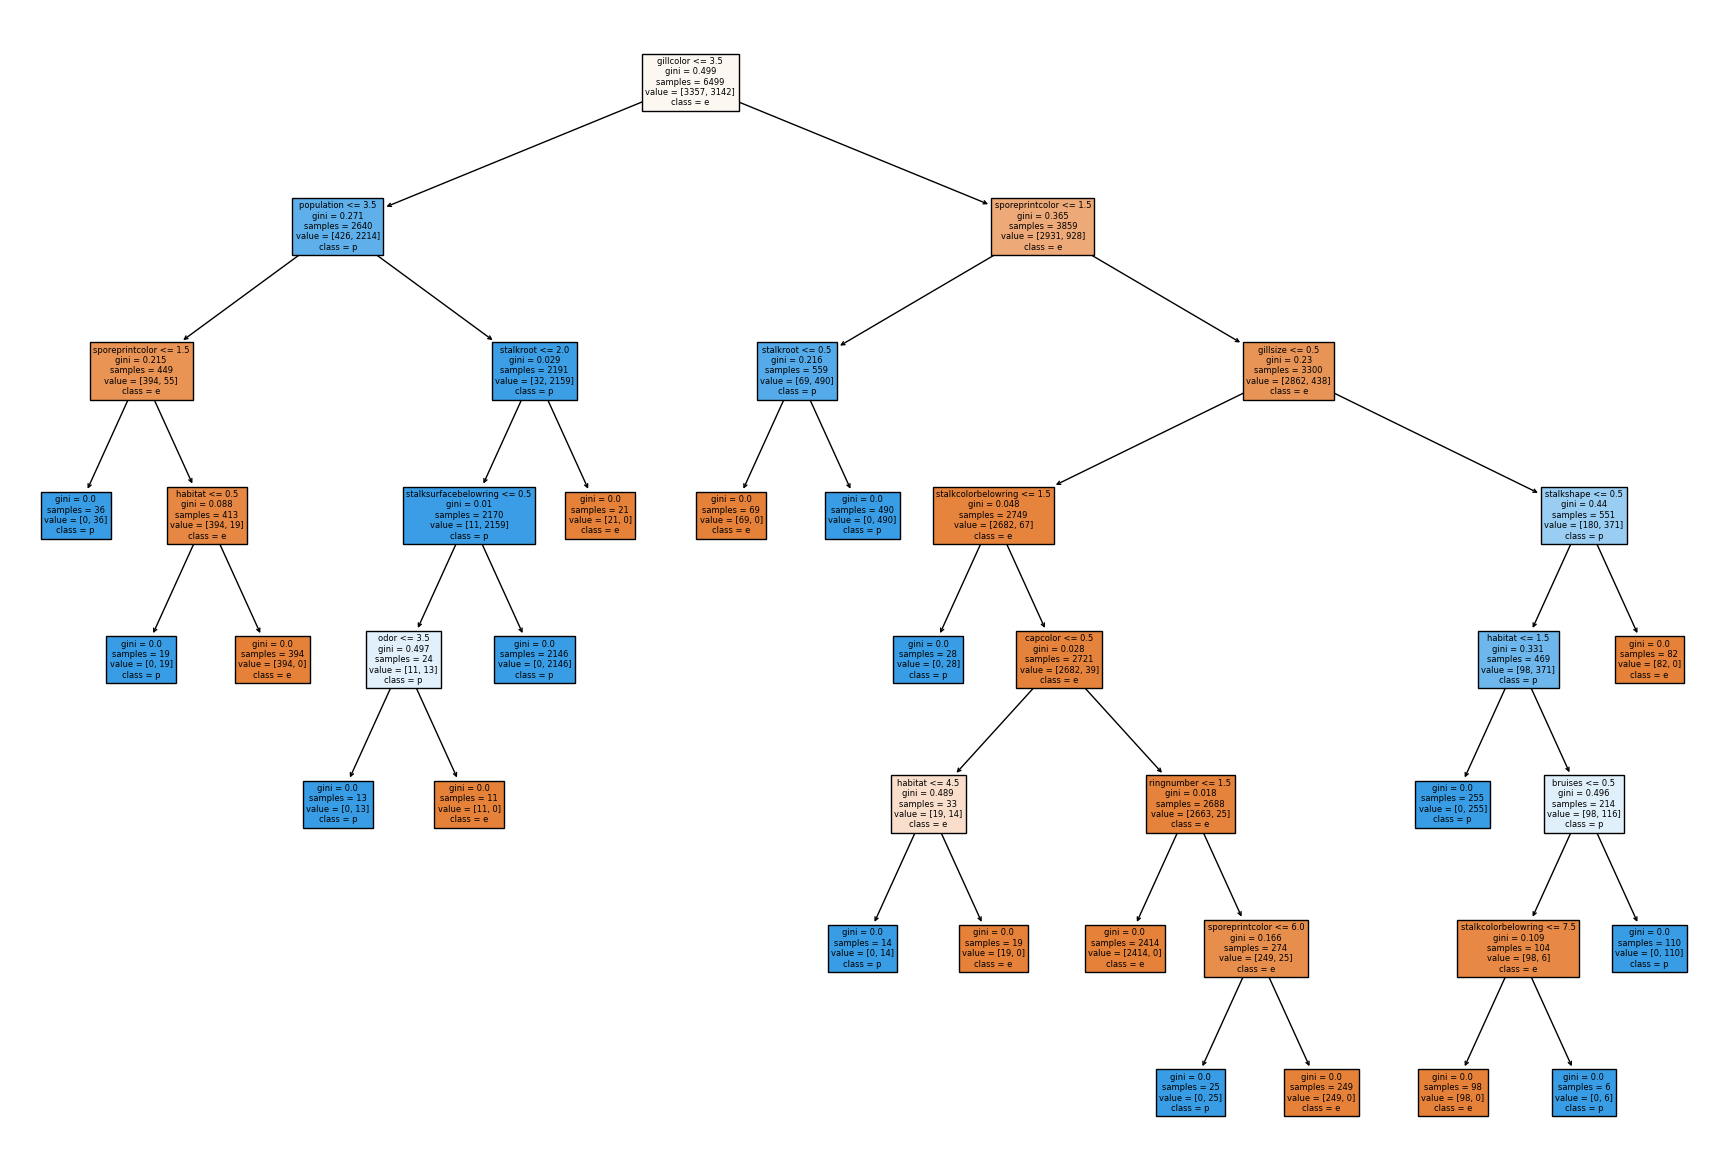

In [216]:
# Visualising the trained model

fig, ax = plt.subplots(figsize = (22, 15))
plot_tree(classifier, filled = True, feature_names = list(X_train.columns), class_names = list(y_train.unique()), ax = ax)
plt.show()

In [217]:
# prediting the output for test data using trained model

y_pred = classifier.predict(X_test)

In [218]:
# Evaluating the predictions 

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"accuracy --> {accuracy * 100}")

confusion_matrix(y_true=y_test, y_pred=y_pred)

accuracy --> 100.0


array([[851,   0],
       [  0, 774]])

In [219]:
# Evaluating the prediction for individual classes

poison_actual = list(y_test).count("p")
edible_actual = list(y_test).count("e")

poison_predicted = 0
edible_predicted = 0

y_test_ = list(y_test)
y_pred_ = list(y_pred)

for itr in range(len(y_test)):
    if y_test_[itr] == y_pred_[itr]:
        if y_pred_[itr] == "p":
            poison_predicted += 1
        else:
            edible_predicted += 1

print(f"accuracy of edible class ---> {(edible_predicted / edible_actual) * 100}")
print(f"accuracy of poison class ---> {(poison_predicted / poison_actual) * 100}")

accuracy of edible class ---> 100.0
accuracy of poison class ---> 100.0


In [220]:
Features_list = []
for col in X.columns:
    Features_list.append(X[col])

# Stacking all the features into array
Features = np.stack(Features_list, 1)

# converting the array of features to tensors
Features = torch.tensor(Features, dtype=torch.float32)
Features


tensor([[5., 2., 4.,  ..., 2., 3., 5.],
        [5., 2., 9.,  ..., 3., 2., 1.],
        [0., 2., 8.,  ..., 3., 2., 3.],
        ...,
        [2., 2., 4.,  ..., 0., 1., 2.],
        [3., 3., 4.,  ..., 7., 4., 2.],
        [5., 2., 4.,  ..., 4., 1., 2.]])

In [221]:
# Label Encoding target column
y = encoder.fit_transform(y)

In [222]:
# converting target column to tensor
y = np.stack(y)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
y

tensor([[1.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])

In [223]:
print(Features.shape)
print(y.shape)

torch.Size([8124, 22])
torch.Size([8124, 1])


In [409]:
# Construct a Network

class FeedForwardNN(nn.Module):

    def __init__(self, inp_size, hidden_size, out_size, p = 0.5):
        super().__init__()
        self.layer1 = nn.Linear(inp_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, out_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.softmax(out)
        return out


In [410]:
len(Features_list)

22

In [411]:
print(Features.shape)
print(y.shape)

torch.Size([8124, 22])
torch.Size([8124, 1])


In [412]:
# Splitting the train and test samples

batch_size = 8124
test_size = int(batch_size * 0.15)

X_train = Features[:batch_size - test_size]
X_test = Features[batch_size - test_size:batch_size]

y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size : batch_size]

In [413]:
print(len(X_train))
print(len(X_test))

print(len(y_train))
print(len(y_test))

6906
1218
6906
1218


In [414]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

torch.Size([6906, 22])
torch.Size([1218, 22])
torch.Size([6906, 1])
torch.Size([1218, 1])


In [415]:
# initializing a model

torch.manual_seed(100)
model = FeedForwardNN(len(Features_list), 50, 2, p = 0.4)
# model = FeedForwardNN(len(Features_list), 2, [100, 50], p = 0.4)
model

FeedForwardNN(
  (layer1): Linear(in_features=22, out_features=50, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=50, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

In [421]:
# Defining a loss function
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [423]:
# Model Training

epochs = 100
final_losses = []

for itr in range(epochs):
    itr = itr + 1
    y_pred = model(X_train)
    y_pred = torch.max(y_pred, dim=1, keepdim=True)[0]
    loss = loss_function(y_pred, y_train)

    final_losses.append(loss)


    print(f"Epoch Number --> {itr} ::::: loss --> {loss}")
    
    optimizer.zero_grad
    loss.backward()
    optimizer.step()

Epoch Number --> 1 ::::: loss --> 0.24857263267040253
Epoch Number --> 2 ::::: loss --> 0.2606337070465088
Epoch Number --> 3 ::::: loss --> 0.27268847823143005
Epoch Number --> 4 ::::: loss --> 0.2829701602458954
Epoch Number --> 5 ::::: loss --> 0.2899061441421509
Epoch Number --> 6 ::::: loss --> 0.2921908497810364
Epoch Number --> 7 ::::: loss --> 0.28868332505226135
Epoch Number --> 8 ::::: loss --> 0.27897852659225464
Epoch Number --> 9 ::::: loss --> 0.26481255888938904
Epoch Number --> 10 ::::: loss --> 0.25542259216308594
Epoch Number --> 11 ::::: loss --> 0.2598847448825836
Epoch Number --> 12 ::::: loss --> 0.27358725666999817
Epoch Number --> 13 ::::: loss --> 0.28907501697540283
Epoch Number --> 14 ::::: loss --> 0.3044901192188263
Epoch Number --> 15 ::::: loss --> 0.3159544765949249
Epoch Number --> 16 ::::: loss --> 0.3353440761566162
Epoch Number --> 17 ::::: loss --> 0.35891973972320557
Epoch Number --> 18 ::::: loss --> 0.3796484172344208
Epoch Number --> 19 ::::: lo